In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import bootstrap
import seaborn as sns


results_dtypes = {
    '\nHyperparameter set': str, 'j': int, 'dag': int, 'nshd_c': float,
    'tpr_c': float
}
hps = '\nHyperparameter set'
meanprops={
    "marker":"o", "markerfacecolor":"white", "markeredgecolor":"black",
    "markersize":"10"
}
usecols = [hps, 'j', 'dag', 'nshd_c', 'tpr_c']
results = pd.read_csv('stochastic.csv', usecols=usecols).astype(results_dtypes)
hpsets = ['STE_Logistic_84', 'IMLE_Logistic_None']
assert set(hpsets) == set(results[hps])
results = results.rename(columns={'tpr_c': 'prec_c'})  # Correct metric name
grouped_results = results.drop(columns='dag').groupby([hps, 'j'])
grouped_means = grouped_results.mean().reset_index()
# sorted = lambda df: df.sort_values(by=hps, ascending=False)

LENGTH = len(results) // 2
assert LENGTH == 240

FIG_SIZE = (10, 6)
matplotlib.rcParams.update({'font.size': 16})

In [2]:
nshd_cs = list()
prec_cs = list()
for hpset in hpsets:
    df = grouped_means[grouped_means[hps] == hpset][['nshd_c', 'prec_c']]
    diff = df.max() - df.min()
    nshd_cs.append(diff['nshd_c'])
    prec_cs.append(diff['prec_c'])
df = pd.DataFrame({r'nSHD$_c$': nshd_cs, r'tpr$_c$': prec_cs})
df.index = ['STE_Logistic_84', 'IMLE_Logistic_None']
fmt = lambda x: f'{x:.4f}'
print(df.transpose().to_latex(formatters=[fmt, fmt]))

\begin{tabular}{lrr}
\toprule
{} & STE\_Logistic\_84 & IMLE\_Logistic\_None \\
\midrule
nSHD\$\_c\$ &          0.0292 &             0.0458 \\
tpr\$\_c\$  &          0.0109 &             0.0131 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_119882/600448948.py:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.transpose().to_latex(formatters=[fmt, fmt]))


STE_Logistic_84
IMLE_Logistic_None


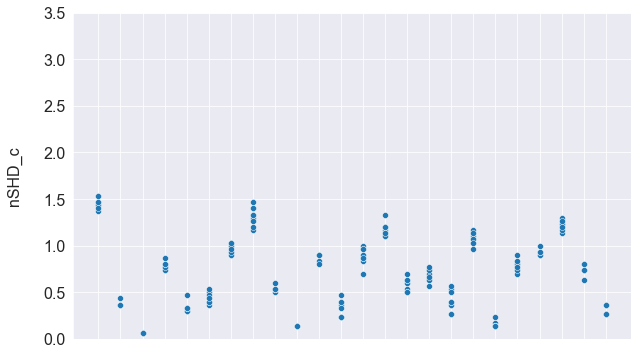

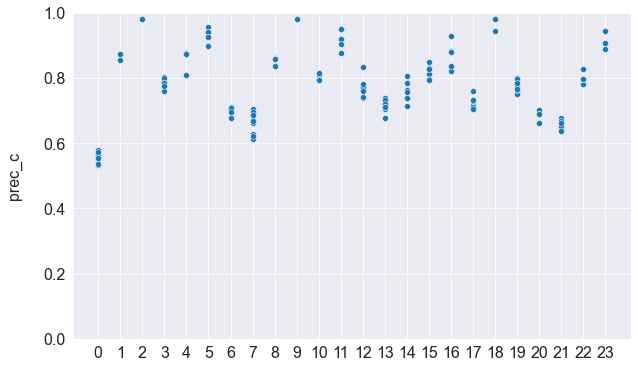

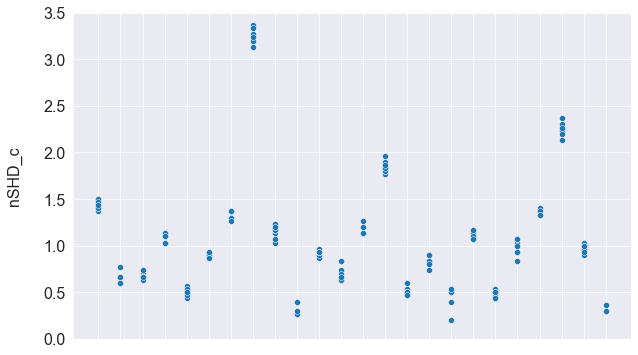

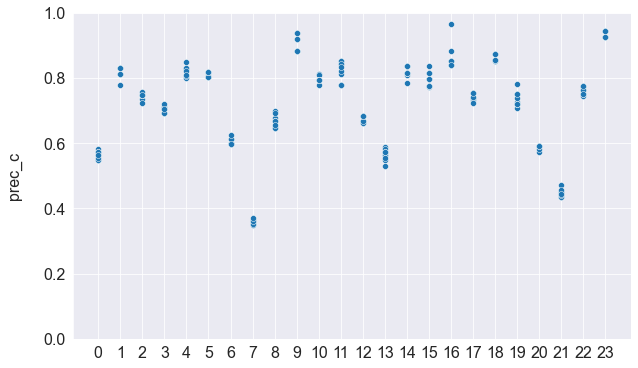

In [9]:
for hpset in hpsets:
    fig, ax = plt.subplots(figsize=FIG_SIZE)
    frame1 = sns.scatterplot(
        x='dag', y='nshd_c', data=results[results[hps] == hpset])
    # plt.xticks(rotation = 75, ha='right')
    frame1.axes.get_xaxis().set_ticks(ticks=list(range(24)), labels=[])
    frame1.axes.set_ylim(0, 3.5)
    # frame1.axes.get_xaxis().set_tickmarks([])
    frame1.axes.set_xlabel(None)
    frame1.axes.set_ylabel('nSHD_c\n')
    # frame1.axes.set_title(r'nSHD$_c$')
    plt.savefig(f'stoch_nshd_c_{hpset}.pdf')
    fig, ax = plt.subplots(figsize=FIG_SIZE)
    frame1 = sns.scatterplot(
        x='dag', y='prec_c', data=results[results[hps] == hpset])
    # plt.xticks(rotation=75, ha='right')
    # frame1.axes.set_title(r'prec$_c$')
    # plt.tight_layout()
    frame1.axes.get_xaxis().set_ticks(list(range(24)))
    frame1.axes.set_ylim(0, 1.)
    frame1.axes.set_xlabel(None)
    frame1.axes.set_ylabel('prec_c\n')
    print(hpset)
    plt.savefig(f'stoch_tpr_c_{hpset}.pdf');

In [11]:
results[(results['dag'] == 2) & (results[hps] == 'STE_Logistic_84')]  # shows overlaps

,j,dag,nshd_c,prec_c,\nHyperparameter set
2,6,2,0.0667,0.9804,STE_Logistic_84
26,1,2,0.0667,0.9804,STE_Logistic_84
50,10,2,0.0667,0.9804,STE_Logistic_84
74,3,2,0.0667,0.9804,STE_Logistic_84
98,2,2,0.0667,0.9804,STE_Logistic_84
122,7,2,0.0667,0.9804,STE_Logistic_84
146,5,2,0.0667,0.9804,STE_Logistic_84
170,8,2,0.0667,0.9804,STE_Logistic_84
194,9,2,0.0667,0.9804,STE_Logistic_84
218,4,2,0.0667,0.9804,STE_Logistic_84


In [12]:
results[(results['dag'] == 7) & (results[hps] == 'STE_Logistic_84')]

,j,dag,nshd_c,prec_c,\nHyperparameter set
7,6,7,1.2667,0.6923,STE_Logistic_84
31,1,7,1.1667,0.7059,STE_Logistic_84
55,10,7,1.3000,0.6716,STE_Logistic_84
79,3,7,1.2000,0.6957,STE_Logistic_84
103,2,7,1.4000,0.6269,STE_Logistic_84
127,7,7,1.4667,0.6119,STE_Logistic_84
151,5,7,1.4000,0.6232,STE_Logistic_84
175,8,7,1.3333,0.6618,STE_Logistic_84
199,9,7,1.3333,0.6667,STE_Logistic_84
223,4,7,1.2667,0.6866,STE_Logistic_84


In [14]:
results[(results['dag'] == 7) & (results[hps] == 'IMLE_Logistic_None')]

,j,dag,nshd_c,prec_c,\nHyperparameter set
247,10,7,3.2667,0.3594,IMLE_Logistic_None
271,9,7,3.2667,0.3571,IMLE_Logistic_None
295,6,7,3.2667,0.3594,IMLE_Logistic_None
319,7,7,3.2667,0.3571,IMLE_Logistic_None
343,1,7,3.3667,0.3488,IMLE_Logistic_None
367,8,7,3.2000,0.3651,IMLE_Logistic_None
391,4,7,3.2000,0.3651,IMLE_Logistic_None
415,3,7,3.3333,0.3516,IMLE_Logistic_None
439,5,7,3.2333,0.3622,IMLE_Logistic_None
463,2,7,3.1333,0.3710,IMLE_Logistic_None


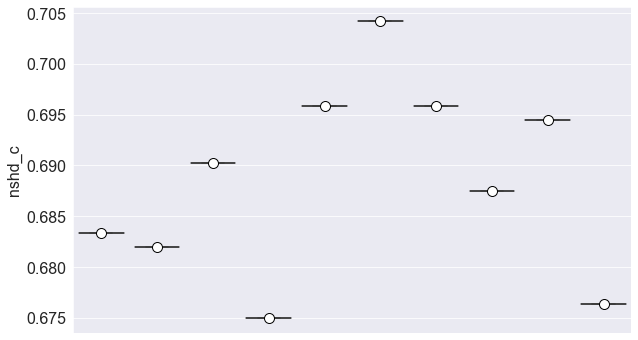

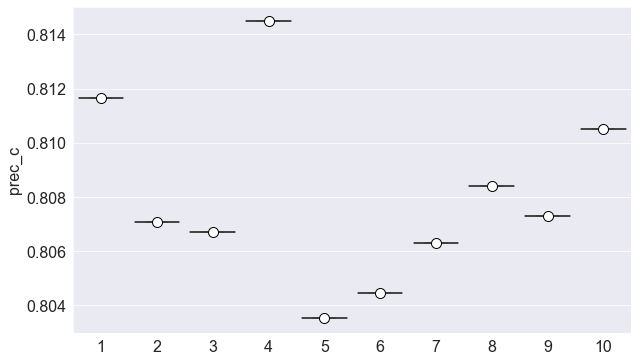

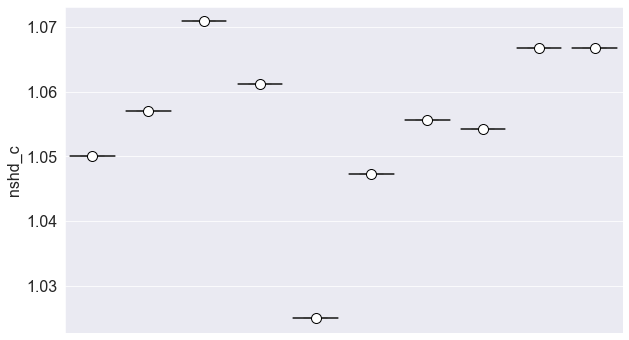

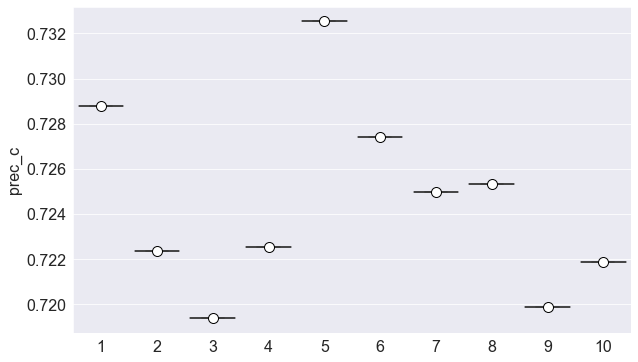

In [5]:
for hpset in hpsets:  # Not used as silly!
    fig, ax = plt.subplots(figsize=FIG_SIZE)
    frame1 = sns.boxplot(
        x='j', y='nshd_c', data=grouped_means[grouped_means[hps] == hpset],
        showmeans=True, meanprops=meanprops)
    # plt.xticks(rotation = 75, ha='right')
    frame1.axes.get_xaxis().set_ticks([])
    frame1.axes.set_xlabel(None)
    # frame1.axes.set_title(r'nSHD$_c$')
    plt.savefig('big_nshd_c.pdf')
    fig, ax = plt.subplots(figsize=FIG_SIZE)
    frame1 = sns.boxplot(
        x='j', y='prec_c', data=grouped_means[grouped_means[hps] == hpset],
        showmeans=True, meanprops=meanprops)
    # plt.xticks(rotation=75, ha='right')
    # frame1.axes.set_title(r'prec$_c$')
    # plt.tight_layout()
    frame1.axes.set_xlabel(None)
# plt.savefig('big_tpr_c.pdf');